# Nerdle Analysis
## by Tim Wang

## Goals for this analysis: 
* Look at the possible entries for Nerdle
* Identify which numbers and operators are more likely to occur in solutions
* Identify the best opening strategy
* See if there is a systematic way to minimize the amount of steps

## Step 1: Define the Universe

### Determine set of possible solutions

Rules
* Each guess is a calculation.
* You can use 0 1 2 3 4 5 6 7 8 9 + - * / or =.
* It must contain one “=”.
* It must only have a number to the right of the “=”, not another calculation.
* Standard order of operations applies, so calculate * and / before + and -
* If the answer we're looking for is 10+20=30, then we will accept 20+10=30 too (unless you turn off 'commutative answers' in settings).

In [194]:
# Iterate a string and check if each character is numeric vs operator

test = '456+34=790'

for c in test:
    print(c + ' ' + str(c.isnumeric()))

4 True
5 True
6 True
+ False
3 True
4 True
= False
7 True
9 True
0 True


#### Define functions to check if a string represents a valid equation.

In [195]:
def consolidate(eq_str):
    
    parts = []
    current = ''
    
    for c in eq_str:
        
        if c.isnumeric():
            current += c
            
        else:
            parts.append(current)
            current = ''
            parts.append(c)
            
    if current != '':
        parts.append(current)
        
    return parts

In [196]:
consolidate('30+40=70')

['30', '+', '40', '=', '70']

In [197]:
def is_valid(eq_str):
    
    # print(eq_str)
    
    allowed_ops = ['+', '-', '*', '/', '=']
    
    operators = []
    numbers = []
    
    # Per Nerdle rules, equations must always end in an equal sign and a number.
    
    eq_list = consolidate(eq_str)
    right_result = eq_list.pop()
    eq_sign = eq_list.pop()
    
    if not(right_result.isnumeric()) or eq_sign != '=':
        return False
    
    # The rest needs to alternate: number, operator, number, ..., operator, number
    # Define 0 as number, 1 as operator
    
    last_ind = -1
    
    for c in eq_list:
        
        # print(c)
        
        if c.isnumeric():
            
            if last_ind == 0:
                return False
            else:
                
                ### Theoretically, 0's can exist on the left side, but
                ### makers of Nerdle stated there are quite many left out
                ### that the players wouldn't like.
                
                ### Eliminating 0's (like + 0, * 0, 0 / x)
                ### gets us closer to the target of 17,723 solutions.
                
                # if len(c) > 1 and c[0] == '0':
                #     return False
                
                
                ### Get rid of numbers like '00001'
                
                if c[0] == '0':
                    return False
                
                int_c = int(c)
                
                if last_ind == -1:
                    numbers.append(int_c)
                    
                else:
                    
                    # Implement PEMDAS
                    # If * or /, calculate now and append product/quotient
                    # If + or -, save for final step
                    # Only one = is allowed, so if =, return False since not valid
                    
                    recent_op = operators.pop()
                    if recent_op == '*':
                        numbers.append(numbers.pop() * int_c)
                    elif recent_op == '/':
                        last_num = numbers.pop()
                        if int_c == 0:
                            return False
                        if last_num % int_c != 0:
                            return False
                        numbers.append(last_num / int_c)
                    elif recent_op == '=':
                        return False
                    else:
                        numbers.append(int_c)
                        operators.append(recent_op)
            
                
            last_ind = 0
            
        else:
            
            if not(c in allowed_ops):
                return False
            
            if last_ind != 0:
                return False
            else:
                last_ind = 1
                operators.append(c)
                
                
    # At this point, the last operators should be + or - with enough arguments.
    
    left_result = numbers.pop(0)
    
    while len(operators) > 0:
        next_op = operators.pop(0)
        num2 = numbers.pop(0)
        
        if next_op == '+':
            left_result += num2
        elif next_op == '-':
            left_result -= num2
        else:
            pass
        
    # print(left_result)
    # print(right_result)
    
    return left_result == int(right_result)

In [198]:
# Test cases

test_cases = ['30+40=70',
              '+30+40=70',
              '-30+40=70',
              '30+*40=70',
              '30+4*0=70',
              '30=40=70',
              '70-40=30',
              '3*4=12',
              '30/10=3',
              '30/4=7',
              '3+6*4=27'
             ]

for test in test_cases:
    print(test + ": " + str(is_valid(test)))

30+40=70: True
+30+40=70: False
-30+40=70: False
30+*40=70: False
30+4*0=70: False
30=40=70: False
70-40=30: True
3*4=12: True
30/10=3: True
30/4=7: False
3+6*4=27: True


In [199]:
# From https://datagy.io/python-permutations-of-string/
# Use Python to get all combinations of a string with repetition

"""

import sys
import time

a_string = '012345'

final_list = [[]]
length = 8
groups = [list(a_string)] * length

print(groups)

for i in groups:
    final_list = [x+[y] for x in final_list for y in i]
    
## permutations = [''.join(item) for item in final_list]

permutations = []

for item in final_list:
    new_entry = ''.join(item)
    permutations.append(new_entry)

    print(new_entry, end = "\r")
    sys.stdout.write("\033[F") # Cursor up one line
    # time.sleep(1)

print(permutations)
# Returns ['aaa', 'aab', 'aac', 'aba', 'abb', 'abc', 'aca', 'acb', 'acc', 'baa', 'bab', 'bac', 'bba', 'bbb', 'bbc', 'bca', 'bcb', 'bcc', 'caa', 'cab', 'cac', 'cba', 'cbb', 'cbc', 'cca', 'ccb', 'ccc']
"""

'\n\nimport sys\nimport time\n\na_string = \'012345\'\n\nfinal_list = [[]]\nlength = 8\ngroups = [list(a_string)] * length\n\nprint(groups)\n\nfor i in groups:\n    final_list = [x+[y] for x in final_list for y in i]\n    \n## permutations = [\'\'.join(item) for item in final_list]\n\npermutations = []\n\nfor item in final_list:\n    new_entry = \'\'.join(item)\n    permutations.append(new_entry)\n\n    print(new_entry, end = "\r")\n    sys.stdout.write("\x1b[F") # Cursor up one line\n    # time.sleep(1)\n\nprint(permutations)\n# Returns [\'aaa\', \'aab\', \'aac\', \'aba\', \'abb\', \'abc\', \'aca\', \'acb\', \'acc\', \'baa\', \'bab\', \'bac\', \'bba\', \'bbb\', \'bbc\', \'bca\', \'bcb\', \'bcc\', \'caa\', \'cab\', \'cac\', \'cba\', \'cbb\', \'cbc\', \'cca\', \'ccb\', \'ccc\']\n'

In [200]:
# print(len(permutations))

In [201]:
def get_permutations(chars, length, suffix):

    a_string = chars

    final_list = [[]]
    groups = [list(a_string)] * length

    for i in groups:
        final_list = [x+[y] for x in final_list for y in i]

    permutations = [''.join(item) + suffix for item in final_list]
    
    return permutations

#### Generating all permutations with repetition for each digit + operator, for a length of 8, will take too much time and memory.

We must split it down to smaller cases.

We know that the equation is 8 slots long, and must end with an equal sign and a number.
* Case 1: _ _ _ _ _ _ = #
* Case 2: _ _ _ _ _ = # #
* Case 3: _ _ _ _ = # # #

If we continue, Case 4 has four digits on the right.

* Case 4: _ _ _ = # # # #

However, the highest the left result is 999, and semantically, the right side should not start with a 0.

Therefore, Case 4 is impossible and we have 3 cases.

#### Case 1: _ _ _ _ _ _ = _

In [202]:
left1 = get_permutations('0123456789+-*/', 6, '=')
case1 = []

for i in range(0, 10):
    for j in left1:
        case1.append(j + str(i))

#### Case 2: _ _ _ _ _ = _ _

In [203]:
left2 = get_permutations('0123456789+-*/', 5, '=')
right2 = [*range(10, 100)]
case2 = []

for i in left2:
    for j in right2:
        case2.append(i + str(j))

#### Case 3: _ _ _ _ = _ _ _

In [204]:
left3 = get_permutations('0123456789+-*/', 4, '=')
right3 = [*range(100, 1000)]
case3 = []

for i in left3:
    for j in right3:
        case3.append(i + str(j))

#### Combine Case 1-3 and extract valid equations

In [205]:
all_cases = case1 + case2 + case3

print("Case 1: " + str(len(case1)))
print("Case 2: " + str(len(case2)))
print("Case 3: " + str(len(case3)))
print("Total number of cases: " + str(len(all_cases)))

Case 1: 75295360
Case 2: 48404160
Case 3: 34574400
Total number of cases: 158273920


In [206]:
valid_eqs = []

for i in all_cases:
    if is_valid(i):
        valid_eqs.append(i)
        
print("Number of valid entries: " + str(len(valid_eqs)))

Number of valid entries: 17447


In [207]:
# valid_eqs[-50:]

## Step 2: Analyze

Use the set of valid equations derived in the last set.

In [208]:
# valid_eqs

### Simple frequencies

#### Frequencies for each digit 0-9 and each allowed operator

In [209]:
### Make one master string to search each allowed char

master_string = ''.join(c for c in valid_eqs)
print(str(master_string[-8:] == valid_eqs[-1:][0]))

True


In [210]:
### Make a list of keys, 0-9 and allowed ops
### We will use each element as a search criterium

digits = [str(a) for a in range(0, 10)]
allowed_ops = ['+', '-', '*', '/', '=']
allowed_chars = digits + allowed_ops
print(allowed_chars)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', '*', '/', '=']


In [211]:
### Create a dictionary which produces the frequency

counts = {a:master_string.count(a) for a in allowed_chars}
print(counts)

{'0': 4943, '1': 14156, '2': 11552, '3': 10087, '4': 10331, '5': 9572, '6': 9540, '7': 8618, '8': 9000, '9': 8552, '+': 7484, '-': 8500, '*': 5672, '/': 4122, '=': 17447}


In [212]:
### Create the chart

import matplotlib.pyplot as plt
import numpy as np

N = len(counts)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

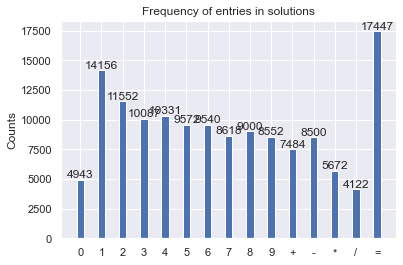

In [213]:
fig, ax = plt.subplots()

p1 = ax.bar(ind, counts.values(), width)

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Counts')
ax.set_title('Frequency of entries in solutions')
ax.set_xticks(ind)
ax.set_xticklabels(counts.keys())
# ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type = 'edge')

plt.show()

It seems that the lower digits, 1-4, see more solutions than 0 and 5-9.

* 1-2 are highest iin frequency, likely driven by the two-digit result summations.
* 0 is lower in frequency because the form of a solution likely does not have a number leading with 0, e.g. 01 instead of 1.

Next step: look at numbers instead of digits - may shed more light to digits as well as operators, e.g. higher frequencies of teens may suggest higher usage of + and -.

#### Frequencies for each number 0 - 999

In [214]:
### Traverse valid equations and collect numbers

numbers = []

for eq in valid_eqs:
    comps = consolidate(eq)
    for comp in comps:
        if comp.isnumeric():
            numbers.append(int(comp))
            
print(numbers[-50:])

[83, 747, 9, 84, 756, 9, 85, 765, 9, 86, 774, 9, 87, 783, 9, 88, 792, 9, 89, 801, 9, 90, 810, 9, 91, 819, 9, 92, 828, 9, 93, 837, 9, 94, 846, 9, 95, 855, 9, 96, 864, 9, 97, 873, 9, 98, 882, 9, 99, 891]


In [215]:
### Create array of keys, i.e. 0-999

x = range(0, 1000)
y = [numbers.count(a) for a in x]

print(x[-50:])
print(y[-50:])

range(950, 1000)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


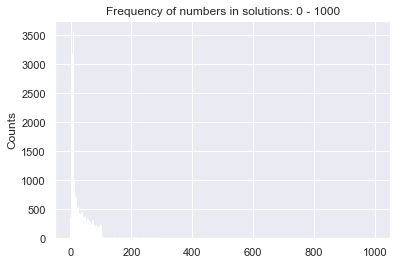

In [216]:
width = 1

fig, ax = plt.subplots()

p1 = ax.bar(x, y, width)

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Counts')
ax.set_title('Frequency of numbers in solutions: 0 - 1000')
# ax.legend()

# Label with label_type 'center' instead of the default 'edge'
# ax.bar_label(p1, label_type = 'edge')

plt.show()

As expected, we don't see much activity past 100 which would require the use of at least one multiplication (*).

Try to truncate at 100 to get a better sense of frequencies.

In [217]:
### Truncate to 100

trunc_pt = 101

x_trunc = x[:trunc_pt]
y_trunc = y[:trunc_pt]

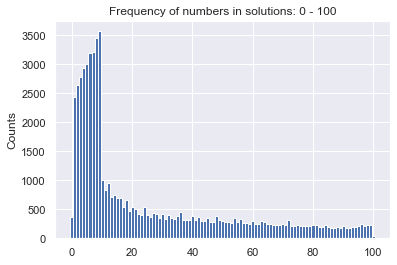

In [218]:
width = 1

fig, ax = plt.subplots()

p1 = ax.bar(x_trunc, y_trunc, width)

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Counts')
ax.set_title('Frequency of numbers in solutions: 0 - 100')
# ax.legend()

# Label with label_type 'center' instead of the default 'edge'
# ax.bar_label(p1, label_type = 'edge')

plt.show()

We see another cutoff at 10, which makes sense. If there are 3 operands and 2 operators on the left, this maximizes the permutations for an eligible equation.

In [219]:
### Truncate to 100

trunc_pt = 11

x_trunc = x[:trunc_pt]
y_trunc = y[:trunc_pt]

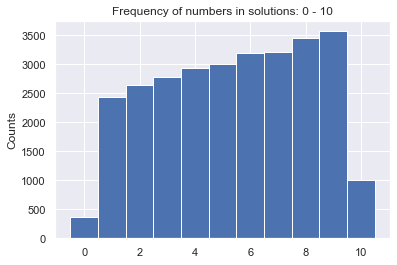

In [220]:
width = 1

fig, ax = plt.subplots()

p1 = ax.bar(x_trunc, y_trunc, width)

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Counts')
ax.set_title('Frequency of numbers in solutions: 0 - 10')
# ax.legend()

# Label with label_type 'center' instead of the default 'edge'
# ax.bar_label(p1, label_type = 'edge')

plt.show()

### Repeated entries in solutions

In order to find the most ideal opener, it might help to look at if it is more effective to open with a solution:
* with repeated digits and/or operators
* with all unique digits and operators

#### Repeated digits

Are there more solutions with repeated digits?

In [221]:
### Traverse valid equations and collect digits

repeats = []
repeat_eqs = []
unique_eq_bool = 0

for eq in valid_eqs:
    eq_dedup = ''.join(set(eq))
    for char in eq_dedup:
        if eq.count(char) > 1 and char.isnumeric():
            repeats.append(char)
            unique_eq_bool = 1
    if unique_eq_bool == 1:
        repeat_eqs.append(eq)
    unique_eq_bool = 0
        
# repeat_counts = {a:repeats.count(a) for a in allowed_chars}
repeat_counts = {a:repeats.count(a) for a in digits}
# repeat_counts = {a:repeats.count(a) for a in allowed_ops}
            
print("Repeat counts: ")
print(repeat_counts)
print("")
print("Sum of repeat counts: " + str(sum(repeat_counts.values())))
print("Unique equations: " + str(len(repeat_eqs)))

Repeat counts: 
{'0': 415, '1': 3202, '2': 2161, '3': 1747, '4': 1828, '5': 1691, '6': 1491, '7': 1318, '8': 1393, '9': 1321}

Sum of repeat counts: 16567
Unique equations: 13584


In [222]:
### Double check: all unique should be 17,447 - # unique equations above
### i.e. 3,863

repeats = []
all_unique = []
unique_eq_counter = 0
unique_eq_bool = 0

for eq in valid_eqs:
    eq_dedup = ''.join(set(eq))
    for char in eq_dedup:
        if eq.count(char) > 1 and char.isnumeric():
            #repeats.append(char)
            unique_eq_bool = 1
    if unique_eq_bool == 0:
        all_unique.append(eq)
        unique_eq_counter += 1
    unique_eq_bool = 0
        
# repeat_counts = {a:repeats.count(a) for a in allowed_chars}
# repeat_counts = {a:repeats.count(a) for a in digits}
# repeat_counts = {a:repeats.count(a) for a in allowed_ops}
            
print("All unique equation counts: " + str(unique_eq_counter))
print(all_unique[-20:])

All unique equation counts: 3863
['94*8=752', '95+7=102', '95+8=103', '95*4=380', '95*8=760', '96+7=103', '96+8=104', '96*5=480', '97+5=102', '97+6=103', '97+8=105', '97*6=582', '98+4=102', '98+5=103', '98+6=104', '98+7=105', '9*42=378', '9*52=468', '9*72=648', '9*84=756']


The answer is **yes**.

There are 13,584 equations out of 17,447 (77.9%) that have a repeat digit!

Now let's split out by number of repeats.
* Are the multiple repeats, e.g. two 1's and two 2's?
* Are there more than two of one digit, e.g. three 1's?

#### Multiple repeats

In [223]:
### Traverse valid equations and collect digits

from itertools import compress

multiple_repeat_eqs = []

for eq in valid_eqs:
    eq_dedup = ''.join(set(eq))
    counts = [eq.count(char) for char in eq_dedup]
    num_repeats = len(list(compress(counts, [a > 1 for a in counts])))
    if num_repeats > 1:
        multiple_repeat_eqs.append(eq)
            
print("Equations with multiple repeats: " + str(len(multiple_repeat_eqs)))
print("")
print(multiple_repeat_eqs[-50:])

Equations with multiple repeats: 3965

['95*9=855', '96*2=192', '96*7=672', '96*8=768', '96*9=864', '97*7=679', '97*9=873', '98*7=686', '98*9=882', '99+1=100', '99+2=101', '99*5=495', '9+91=100', '9+92=101', '9*15=135', '9*16=144', '9*19=171', '9*21=189', '9*22=198', '9*25=225', '9*29=261', '9*32=288', '9*33=297', '9*35=315', '9*39=351', '9*44=396', '9*45=405', '9*49=441', '9*50=450', '9*51=459', '9*55=495', '9*58=522', '9*59=531', '9*66=594', '9*69=621', '9*75=675', '9*77=693', '9*79=711', '9*87=783', '9*88=792', '9*89=801', '9*90=810', '9*91=819', '9*92=828', '9*93=837', '9*94=846', '9*95=855', '9*96=864', '9*97=873', '9*98=882']


In [224]:
len(multiple_repeat_eqs) / len(valid_eqs)

0.22725970080816185

3,965 solutions out of 17,447 valid equations contain more than one digit repeated. That's about 22.7% of solutions.

#### Repeats more than double

In [225]:
### Traverse valid equations and collect digits

from itertools import compress

repeat_more_than_double_eqs = []
repeat_more_than_double_digits = []

for eq in valid_eqs:
    eq_dedup = ''.join(set(eq))
    counts = [eq.count(char) for char in eq_dedup]
    num_repeats = len(list(compress(counts, [a > 2 for a in counts])))
    if num_repeats > 0:
        repeat_more_than_double_eqs.append(eq)
        digit_add = list(compress(eq_dedup, [a > 2 for a in counts]))
        repeat_more_than_double_digits += digit_add
            
print("Equations with multiple repeats: " + str(len(repeat_more_than_double_eqs)))
print("")
print(multiple_repeat_eqs[-50:])

Equations with multiple repeats: 2077

['95*9=855', '96*2=192', '96*7=672', '96*8=768', '96*9=864', '97*7=679', '97*9=873', '98*7=686', '98*9=882', '99+1=100', '99+2=101', '99*5=495', '9+91=100', '9+92=101', '9*15=135', '9*16=144', '9*19=171', '9*21=189', '9*22=198', '9*25=225', '9*29=261', '9*32=288', '9*33=297', '9*35=315', '9*39=351', '9*44=396', '9*45=405', '9*49=441', '9*50=450', '9*51=459', '9*55=495', '9*58=522', '9*59=531', '9*66=594', '9*69=621', '9*75=675', '9*77=693', '9*79=711', '9*87=783', '9*88=792', '9*89=801', '9*90=810', '9*91=819', '9*92=828', '9*93=837', '9*94=846', '9*95=855', '9*96=864', '9*97=873', '9*98=882']


In [226]:
repeat_more_than_double_digits_counts = {a:repeat_more_than_double_digits.count(a) for a in digits}
print(repeat_more_than_double_digits_counts)

{'0': 104, '1': 412, '2': 283, '3': 213, '4': 253, '5': 264, '6': 175, '7': 106, '8': 149, '9': 118}


In [227]:
len(repeat_more_than_double_eqs) / len(valid_eqs)

0.11904625437037886

2,077 solutions out of 17,447 valid equations contain repeat digits of 3 or more instances. That's about 11.9% of solutions.

Not surprisingly, 1 is the most common repeated digit here as well.

#### Positions for repeat digits

In [228]:
eq='30+30=60'
eq_dedup = ''.join(set(eq))
counts = [eq.count(char) for char in eq_dedup]
dup_digits = list(compress(eq_dedup, [a > 1 for a in counts]))

print(dup_digits)

['0', '3']


In [229]:
positions = []

for eq in repeat_eqs:
    eq_dedup = ''.join(set(eq))
    counts = [eq.count(char) for char in eq_dedup]
    dup_digits = list(compress(eq_dedup, [a > 1 for a in counts]))
    for i in range(0, 8):
        if eq[i].isnumeric() and eq[i] in dup_digits:
            positions.append(i)
            # print(eq)
            # print(i)

In [230]:
position_freqs = {ind:positions.count(ind) for ind in range(0, 8)}
print(position_freqs)

{0: 5820, 1: 4689, 2: 2603, 3: 4386, 4: 4736, 5: 2323, 6: 4073, 7: 6667}


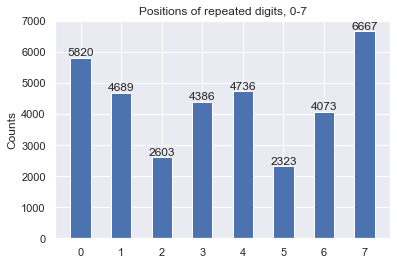

In [231]:
width = 0.5

fig, ax = plt.subplots()

p1 = ax.bar(position_freqs.keys(), position_freqs.values(), width)

ax.axhline(0, color='grey', linewidth = 0.8)
ax.set_ylabel('Counts')
ax.set_title('Positions of repeated digits, 0-7')
# ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type = 'edge')

plt.show()

Interestingly, repeated digits show up in the last and first slot most often.

Not surprisingly, slots 2 and 5 do not see much repetition, as these are often occupied by operands (+, -, *, / for 2 and = for 5).

#### Digit companionship heat map

"Companionship" is meant by the co-existence of two digits in the solutions base.

For example, given that there is a "1" in the solution, what is the probability that there is also a "7"?

In [232]:
import numpy as np
 
rows = 10
cols = 10
size = rows * cols
 
companionship_map = np.array([0] * size, dtype=float).reshape(rows,cols)

for given in range(0, 10):
    limited_set = list(compress(valid_eqs, [eq.count(str(given)) > 0 for eq in valid_eqs]))
    for second in range(0, 10):
        double_limit_set = list(compress(limited_set, [eq.count(str(second)) > 0 for eq in limited_set]))
        companionship_map[given][second] = len(double_limit_set) / len(limited_set)

In [233]:
print(companionship_map)

[[1.         0.53910488 0.45976492 0.38517179 0.41094033 0.42631103
  0.38132911 0.32368897 0.35443038 0.32911392]
 [0.22649573 1.         0.4640076  0.42507123 0.42573599 0.39838557
  0.41927825 0.38347578 0.39468186 0.37283951]
 [0.22351648 0.53692308 1.         0.41516484 0.4489011  0.38615385
  0.40912088 0.39395604 0.39923077 0.35461538]
 [0.20998152 0.55157116 0.46555761 1.         0.4207024  0.41873075
  0.41355514 0.38151571 0.38077634 0.37634011]
 [0.22073822 0.54431763 0.4959932  0.41452161 1.         0.38513842
  0.41537154 0.36316173 0.39667314 0.35709082]
 [0.24802735 0.55168332 0.4621252  0.44687007 0.41714887 1.
  0.38532351 0.36875329 0.37019989 0.36796423]
 [0.21452187 0.56141913 0.47342319 0.42675483 0.43502035 0.37258393
  1.         0.35414547 0.39331129 0.36762462]
 [0.19911012 0.56145717 0.49847052 0.43047831 0.41587875 0.38987764
  0.38723582 1.         0.368604   0.39126808]
 [0.21041331 0.55770263 0.48752013 0.41465378 0.4384058  0.37775094
  0.41505636 0.35574

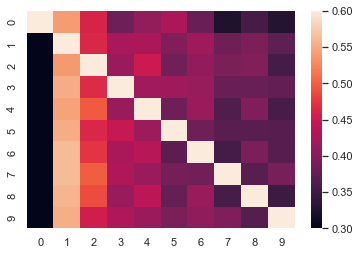

In [234]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(companionship_map, vmin = 0.3, vmax = 0.6)

### Information theory and entropy
#### Ideal starter and assocaited performance

This analysis relies on similar concepts presented in the Wordle analysis below.
https://www.youtube.com/watch?v=v68zYyaEmEA

Presented is some information theory, which states that 1 bit of information cuts the number of possible outcomes in half.

For each equation, we make use of the three different states - black, purple, and green - and run through the $3^{8}$ scenarios to get a weighted information bits "score".

In [235]:
# Global variables for 3 colored states.

BLACK = 0
PURPLE = 1
GREEN = 2

In [236]:
"""
Get score = -log_2{p}
Since each outcome is equally likely, p = 1 / (# of outcomes)
Thus, score = -log_2{p} = log_2{# of outcomes}

Parameters:
    states - list of 8 elements; 0 for black, 1 for purple, 2 for green
    
v2 - improvements for efficiency...because v1 was taking too long even with parallelization
    Put everything in one for-loop for all remaining equations.
    
    That way, the efficiency becomes O(n) for this method, 
    and O(n^2) as we traverse for all equations.
    
"""

import re

def get_remaining_solutions(remaining_eqs, checking_eq, states):
    BLACK = 0
    PURPLE = 1
    GREEN = 2
    
    residual_eqs_1 = []
    
    # Case 1
    
    # First, eliminate equations that don't meet green slots.
    
    # Then purge equations that have entries in the wrong spot 
    # as shown in checking_eq, aka any spot with black OR purple
    
    green_indices = [i for i, x in enumerate(states) if x == GREEN]
    other_indices = [i for i, x in enumerate(states) if x != GREEN]
    regex_list = ['.'] * 8
    
    # print(green_indices)
    # print(other_indices)
    
    for ind in green_indices:
        literal_prefix = ''
        if checking_eq[ind] in ['+', '*']:
            literal_prefix = '\\'
        regex_list[ind] = literal_prefix + checking_eq[ind]
        # print(regex_list)
        
    for ind in other_indices:
        literal_prefix = ''
        if checking_eq[ind] in ['+', '*']:
            literal_prefix = '\\'
        regex_list[ind] = '[^' + literal_prefix + checking_eq[ind] + ']'
    
    # Case 2
    
    # Then, consider equations that violate counts 
    # using purple and black.
    
    black_indices = [i for i, x in enumerate(states) if x == BLACK]
    purple_indices = [i for i, x in enumerate(states) if x == PURPLE]

    black_values = []
    purple_values = []
    green_values = []
    
    for i in black_indices:
        black_values.append(checking_eq[i])
    for i in purple_indices:
        purple_values.append(checking_eq[i])
    for i in green_indices:
        green_values.append(checking_eq[i])
    
    # Case 2a
    
    # Start with digits with both black and purple.
    # Purge equations with incorrect count.
    
    intersect_values = list(set(black_values).intersection(set(purple_values)))
          
    # Case 2b
    
    # Then purge equations that have 0 of values with purple 
    # but no black
    
    purple_only_values = list(set(purple_values) - set(intersect_values))
    
    # Case 2c
    
    # Then purge equations that have 1+ of values with black 
    # but no purple
    
    black_only_values = list(set(black_values) - set(intersect_values))
    
    # print(intersect_values)
    # print(purple_only_values)
    # print(black_only_values)
    
    # Final - put everything together in one for loop to only traverse once
    
    eqs_to_eliminate = []
    
    for eq in remaining_eqs:
        
        # Case 1 - Exact indices
        
        result = re.match(''.join(regex_list), eq)
        
        if not result:
            eqs_to_eliminate.append(eq)
            # print(eq + ": " + "Case 1")
            continue
        
        # Case 2a - Purple and black repeat chars
        
        case2 = 0
        
        for val in intersect_values:
            num_in_solution = purple_values.count(val) + green_values.count(val)
            eq_count = eq.count(val)
            if eq_count != num_in_solution:
                eqs_to_eliminate.append(eq)
                case2 = 1
        
        if case2 == 1:
            # print(eq + ": " + "Case 2a")
            continue
            
        # Case 2b - Purple chars with no black repeats
        
        for val in purple_only_values:
            num_in_solution = purple_values.count(val)
            eq_count = eq.count(val)
            if eq_count < num_in_solution:
                eqs_to_eliminate.append(eq)
                case2 = 1
        
        if case2 == 1:
            # print(eq + ": " + "Case 2b")
            continue
            
        # Case 2c - Black chars with no purple repeats
        
        for val in black_only_values:
            eq_count = eq.count(val)
            if eq_count > green_values.count(val):
                # print(val)
                # print(eq_count)
                # print(eq + ": " + "Case 2c")
                eqs_to_eliminate.append(eq)

    residual_eqs = list(set(remaining_eqs) - set(eqs_to_eliminate))
    
    return residual_eqs
    

In [237]:
"""
Get remaining bits = -log_2{p}
Since each outcome is equally likely, p = 1 / (# of outcomes)
Thus, bits = -log_2{p} = log_2{# of outcomes}

Parameters:
    potential_sols - list of remaining solutions
    
Returns:
    bits, probability
"""

import math

def get_bits(potential_sols):
    if len(potential_sols) == 0:
        return 0.0, 0.0
    return math.log(len(potential_sols), 2), 1 / len(potential_sols)

In [238]:
# Test cell
# 0 for black, 1 for purple, 2 for green

remaining_eqs = valid_eqs
checking_eq = "30+44=74"
states = [0, 1, 0, 1, 0, 2, 0, 0]
# states = [2] * 8

remain = get_remaining_solutions(remaining_eqs, checking_eq, states)
print(remain)

bits = get_bits(remain)
print(bits)

['140/5=28', '68-28=40', '540/9=60', '450/9=50', '42-22=20', '480/6=80', '91-50=41', '95-55=40', '4*5/2=10', '65-20=45', '640/8=80', '58-10=48', '62-22=40', '6*8-8=40', '68-20=48', '540/6=90', '52-10=42', '5*9-5=40', '42-20=22', '490/5=98', '66-26=40', '91-51=40', '1*8*5=40', '45-20=25', '92-52=40', '45-25=20', '96-56=40', '1*5*8=40', '9*5-5=40', '5*4/2=10', '48-20=28', '99-50=49', '58-18=40', '4/1*5=20', '5*8*1=40', '95-50=45', '49-20=29', '99-59=40', '460/5=92', '4*5/1=20', '62-20=42', '5*4/1=20', '46-20=26', '69-20=49', '8*5*1=40', '48-28=20', '5*8/1=40', '98-50=48', '5*4*1=20', '56-16=40', '49-29=20', '4/2*5=10', '69-29=40', '59-19=40', '51-11=40', '41-20=21', '61-21=40', '41-21=20', '61-20=41', '410/5=82', '8*5/1=40', '480/8=60', '1*4*5=20', '210/5=42', '98-58=40', '5/1*8=40', '8*6-8=40', '52-12=40', '55-15=40', '92-50=42', '480/5=96', '59-10=49', '56-10=46', '4*5*1=20', '46-26=20', '55-10=45', '51-10=41', '66-20=46', '8*1*5=40', '8/4*5=10', '8/1*5=40', '65-25=40', '5*1*8=40', '96

In [239]:
### Helper method
### For guess, generate list of 8 colors representing the states based on true_answer.

def generate_states(guess, true_answer):

    states = [0] * 8
    not_green = []
    
    for i in range(8):
        if guess[i] == true_answer[i]:
            states[i] = GREEN
        else:
            not_green.append(i)
    
    #guess_counts = dict()
    ans_counts = dict()
    
    # Get counts in answer for purple/black overlaps.
    for j in not_green:

        #guess_counts[j] = guess_counts.get(j, 0) + 1
        char = true_answer[j]
        ans_counts[char] = ans_counts.get(char, 0) + 1
        
    # Assign sequentially for non-green indices.
    for k in not_green:
        
        char = guess[k]
        if ans_counts.get(char, 0) > 0:
            states[k] = PURPLE
            ans_counts[char] = ans_counts.get(char, 0) - 1
        else:
            states[k] = BLACK
    
    return states
        

In [240]:
generate_states('33+33=66', '88-55=33')

[1, 1, 0, 0, 0, 2, 0, 0]

In [241]:
def get_info_distribution(remaining_eqs, eq):
    
    # If poss were the answer, what would the UI show?
    # Partition remaining_eqs and get counts for each configuration.
    dist = dict()
    for poss in remaining_eqs:
        states = generate_states(eq, poss)
        hashed_key = "".join([str(x) for x in states])
        dist[hashed_key] = dist.get(hashed_key, 0) + 1
        
    return dist

In [242]:
def get_info_bits(remaining_eqs, eq):
    
    dist = get_info_distribution(remaining_eqs, eq)
    
    # Iterate the configurations and weight the info (entropy).
    weighted_bits_remaining = 0
    for count in list(dist.values()):
        weighted_bits_remaining += float(count) / len(remaining_eqs) * math.log(count, 2)
    
    return (eq, math.log(len(remaining_eqs), 2) - weighted_bits_remaining)

In [243]:
from joblib import Parallel, delayed
import time
from tqdm import tqdm

info_tuples = Parallel(n_jobs=16)(delayed(get_info_bits)(valid_eqs, eq) for eq in tqdm(valid_eqs))

100%|█████████████████████████████████████| 17447/17447 [07:32<00:00, 38.55it/s]


In [244]:
import pandas as pd

index_list = []
value_list = []

for a, b in info_tuples:
    index_list.append(a)
    value_list.append(b)
    
ser = pd.Series(value_list, index = index_list)
ser.sort_values(axis = 0, ascending = False)

48-32=16    9.782102
48-36=12    9.766884
43-25=18    9.763686
45-27=18    9.755900
46-27=19    9.755305
              ...   
50/5-5=5    5.747207
688/86=8    5.611285
64/4/4=4    5.505691
8*86=688    5.424632
86*8=688    5.246453
Length: 17447, dtype: float64

In [245]:
print(ser.sort_values(axis = 0, ascending = False).idxmax())

48-32=16


That means that the ideal starter is '48-32=16', as it results in the lowest expected entropy.

#### What does going with the best starter look like at the worst case?

Sort of like a minimax - we're minimizing the loss on the worst case

In [246]:
best_starter = ser.sort_values(axis = 0, ascending = False).idxmax()
print(best_starter)

48-32=16


In [247]:
best_starter_dist = get_info_distribution(valid_eqs, best_starter)

In [248]:
index_list_best = []
value_list_best = []

for a in best_starter_dist.keys():
    index_list_best.append(a)
    value_list_best.append(best_starter_dist.get(a, 0))
    
ser_best = pd.Series(value_list_best, index = index_list_best)
ser_best.sort_values(axis = 0, ascending = False)

00011210    110
10001110     93
00010110     90
00101110     89
01000210     87
           ... 
22000212      1
22002211      1
22010201      1
20221221      1
01020100      1
Length: 1687, dtype: int64

In [249]:
remain = get_remaining_solutions(valid_eqs, '48-32=16', [0, 1, 0, 2, 0, 1, 0, 0])
print(remain)

['9*93=837']


In [250]:
remain = get_remaining_solutions(valid_eqs, '48-32=16', [0, 0, 0, 1, 1, 2, 1, 0])
print(len(remain))

110


In [251]:
step2 = Parallel(n_jobs=16)(delayed(get_info_bits)(remain, eq) for eq in tqdm(remain))

100%|███████████████████████████████████████| 110/110 [00:00<00:00, 3360.75it/s]


In [252]:
index_list = []
value_list = []

for a, b in step2:
    index_list.append(a)
    value_list.append(b)
    
ser = pd.Series(value_list, index = index_list)
next_step = ser.sort_values(axis = 0, ascending = False).idxmax()
print("Next step: " + next_step)

next_step_dist = get_info_distribution(remain, next_step)

index_list_next = []
value_list_next = []

for a in next_step_dist.keys():
    index_list_next.append(a)
    value_list_next.append(next_step_dist.get(a, 0))
    
ser_next = pd.Series(value_list_next, index = index_list_next)
worst_case_state = ser_next.sort_values(axis = 0, ascending = False).idxmax()
worst_case = [int(x) for x in worst_case_state]
print("Worst case state: ")
print(worst_case)

remain = get_remaining_solutions(remain, next_step, worst_case)
print(len(remain))

Next step: 19+13=32
Worst case state: 
[1, 1, 0, 0, 1, 2, 0, 1]
7


In [253]:
def worst_case_on_best_info(possible_eqs):
    
    tries = 0
    remain = possible_eqs
    
    while len(remain) > 1:
    
        step = Parallel(n_jobs=32)(delayed(get_info_bits)(remain, eq) for eq in tqdm(remain))

        index_list = []
        value_list = []

        for a, b in step:
            index_list.append(a)
            value_list.append(b)

        ser = pd.Series(value_list, index = index_list)
        next_step = ser.sort_values(axis = 0, ascending = False).idxmax()
        print("Next step: " + next_step)

        next_step_dist = get_info_distribution(remain, next_step)

        index_list_next = []
        value_list_next = []

        for a in next_step_dist.keys():
            index_list_next.append(a)
            value_list_next.append(next_step_dist.get(a, 0))

        ser_next = pd.Series(value_list_next, index = index_list_next)
        worst_case_state = ser_next.sort_values(axis = 0, ascending = False).idxmax()
        worst_case = [int(x) for x in worst_case_state]
        print("Worst case state: ")
        print(worst_case)

        remain = get_remaining_solutions(remain, next_step, worst_case)
        print(len(remain))
        
        tries += 1
    
    return tries + 1

In [254]:
worst_case_on_best_info(valid_eqs)

100%|█████████████████████████████████████| 17447/17447 [07:09<00:00, 40.59it/s]


Next step: 48-32=16
Worst case state: 
[0, 0, 0, 1, 1, 2, 1, 0]
110


100%|███████████████████████████████████████| 110/110 [00:00<00:00, 8514.00it/s]


Next step: 19+13=32
Worst case state: 
[1, 1, 0, 0, 1, 2, 0, 1]
7


100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 1417.27it/s]

Next step: 3*9/1=27
Worst case state: 
[2, 2, 2, 2, 2, 2, 2, 2]
1


4

Theoretically, you can generally expect to score 4/6 based on the outcome above.

Let's test it out in the event space to see if that's true.

In [276]:
def num_tries_best_info(possible_eqs, solution, annotate = True):
    
    if annotate:
        print("Next step: 48-32=16")
    
    if solution == '48-32=16':
        print("Solution: ")
        print("['48-32=16']")
        return 1
    
    tries = 1
    states = generate_states('48-32=16', solution)
    remain = get_remaining_solutions(possible_eqs, '48-32=16', states)
    
    while len(remain) > 1:
    
        step = Parallel(n_jobs=32)(delayed(get_info_bits)(remain, eq) for eq in remain)

        index_list = []
        value_list = []

        for a, b in step:
            index_list.append(a)
            value_list.append(b)

        ser = pd.Series(value_list, index = index_list).sort_values(axis = 0, ascending = False)
        #print(ser)
        next_step = ser.idxmax()
        if annotate:
            print("Next step: " + next_step)

        states = generate_states(next_step, solution)
        #print(states)
        remain = get_remaining_solutions(remain, next_step, states)
        #print(len(remain))
        if states == [2] * 8:
            break
        
        tries += 1
    
    if annotate:
        print("Solution: ")
        print(remain)
    return tries + 1

In [256]:
#num_tries_best_info(valid_eqs, '7*4-3=25')

states = [2, 0, 2, 2, 2, 2, 2, 0]
remain = get_remaining_solutions(remain, '47-16=31', states)

step = Parallel(n_jobs=32)(delayed(get_info_bits)(remain, eq) for eq in remain)

index_list = []
value_list = []

for a, b in step:
    index_list.append(a)
    value_list.append(b)

ser = pd.Series(value_list, index = index_list).sort_values(axis = 0, ascending = False)
print(ser)
next_step = ser.idxmax()
print("Next step: " + next_step)

In [269]:
tries = dict()
for eq in tqdm(valid_eqs):
    tries[eq] = num_tries_best_info(valid_eqs, eq, annotate = False)

100%|█████████████████████████████████████| 17447/17447 [20:19<00:00, 14.30it/s]


In [271]:
# print(tries)

In [272]:
eq_list = []
tries_list = []

for a, b in tries.items():
    eq_list.append(a)
    tries_list.append(b)
    
ser = pd.Series(tries_list, index = eq_list)
ser.sort_values(axis = 0, ascending = False)

99-19=80    6
31-20=11    6
8*5+4=44    6
41-30=11    6
41-10=31    6
           ..
101-2=99    2
82-18=64    2
100-8=92    2
4+5*2=14    2
48-32=16    1
Length: 17447, dtype: int64

Our strategy solves all of the cases within 6 tries!

Let's test one out.

In [273]:
num_tries_best_info(valid_eqs, '4+1+6=11')

Next step: 4+6/1=10
Next step: 4+4+6=14
Next step: 4+7+6=17
Next step: 4+5+6=15
Next step: 4+1+6=11
Solution: 
['4+1+6=11']


6

It is a 3-sum case, where two numbers sum to 10, generating a repeat digit and many possibilities for the last sum component.

In other words,
4 + _ + 6 = 1_
where the _ can theoretically be any digit 0-9 but is only subsetted based on prior guesses.

In [274]:
import numpy as np

np_tries = np.array(tries_list)
np.average(np_tries)

3.073193099100132

[Text(0.5, 1.0, 'Distribution of scores for info theory / entropy method')]

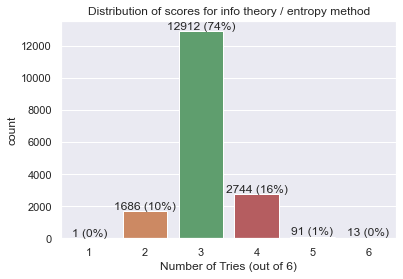

In [275]:
ax = sns.countplot(x = tries_list)

unique, counts = np.unique(tries_list, return_counts = True)

abs_values = counts
rel_values = counts / sum(counts) * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_xlabel("Number of Tries (out of 6)", fontsize = 12)
ax.set(title = 'Distribution of scores for info theory / entropy method')

Our strategy never fails a game, and scores 3/6 or better 84% of the time!

Average score of 3.07 / 6